**Evaluation Project - 6**

**Loan Application Status Prediction**

**Problem Statement:**

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

**Independent Variables:**

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

**Dependent Variable (Target Variable):**

- Loan_Status

You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

Note: The link of the dataset is below. 

Downlaod Files:

https://github.com/dsrscientist/DSData/blob/master/loan_prediction.csv

In [ ]:
import pandas as pd
import numpy as np
import warnings # Filtering warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
print("Number of rows in the given dataset:",df.shape[0])

print("Number of columns in the given dataset:",df.shape[1])

Number of rows in the given dataset: 614
Number of columns in the given dataset: 13


In [ ]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
# Checking for duplicate data if any

df.duplicated().sum()

0

**No duplicate observations present in the given dataset**

In [ ]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

**Missing values found in below columns:**

  * Gender
  * Married
  * Dependents
  * Self_Employed
  * LoanAmount
  * Loan_Amount_Term
  * Credit_History

In [ ]:
# Checking datatypes of the columns

df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [ ]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
import plotly.graph_objs as go
import plotly.offline as py

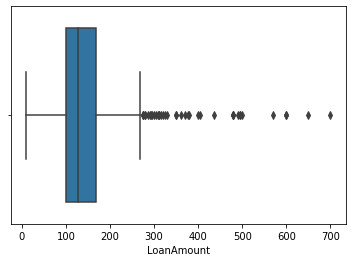

In [ ]:
sns.boxplot(df['LoanAmount'])

**Since outliers present in the Loan Amount, imputation of missing values can be done using Median as mean is sensitive to outliers**

In [ ]:
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

**Imputation of missing values:**

  * Gender,Married,Dependents and Self_Employed are categorical in nature and missing values can be imputed using most frequent values in these columns

  * Credit_History column can be imputed using mode value as it has two unique values

  * LoanAmount can be imputed using Median because of the presence of outliers

  * Most frequent Loan amount term is 360 months and missing values can be imputed using mode for this column

In [ ]:
# Imputation of categorical columns

df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])

df['Married'] = df['Married'].fillna(df['Married'].mode()[0])

df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])

df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])

# Imputation of numerical columns

df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())

df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])



In [ ]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

**So missing values imputation has been done,let's do some more analysis of the dataset**

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.50,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.00,1188.5,2297.25,41667.0
LoanAmount,614.0,145.752443,84.107233,9.0,100.25,128.0,164.75,700.0
Loan_Amount_Term,614.0,342.410423,64.428629,12.0,360.00,360.0,360.00,480.0
Credit_History,614.0,0.855049,0.352339,0.0,1.00,1.0,1.00,1.0


  * For Applicant Income & Coapplicant Income columns, Std deviation value is greater than mean value. So data is spread and skewed.

  * Looking into 75% value and Max value of Applicant Income, Coapplicant Income and Loan Amount, presence of outliers can be seen.

  * Minimum Tenure for Loan is 12 Months and Maximum Loan tenure is 480 Months.
Minimum Applicant income is 150 and maximum is 81000.


In [ ]:
# Separating the categorical variables

catg = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status']

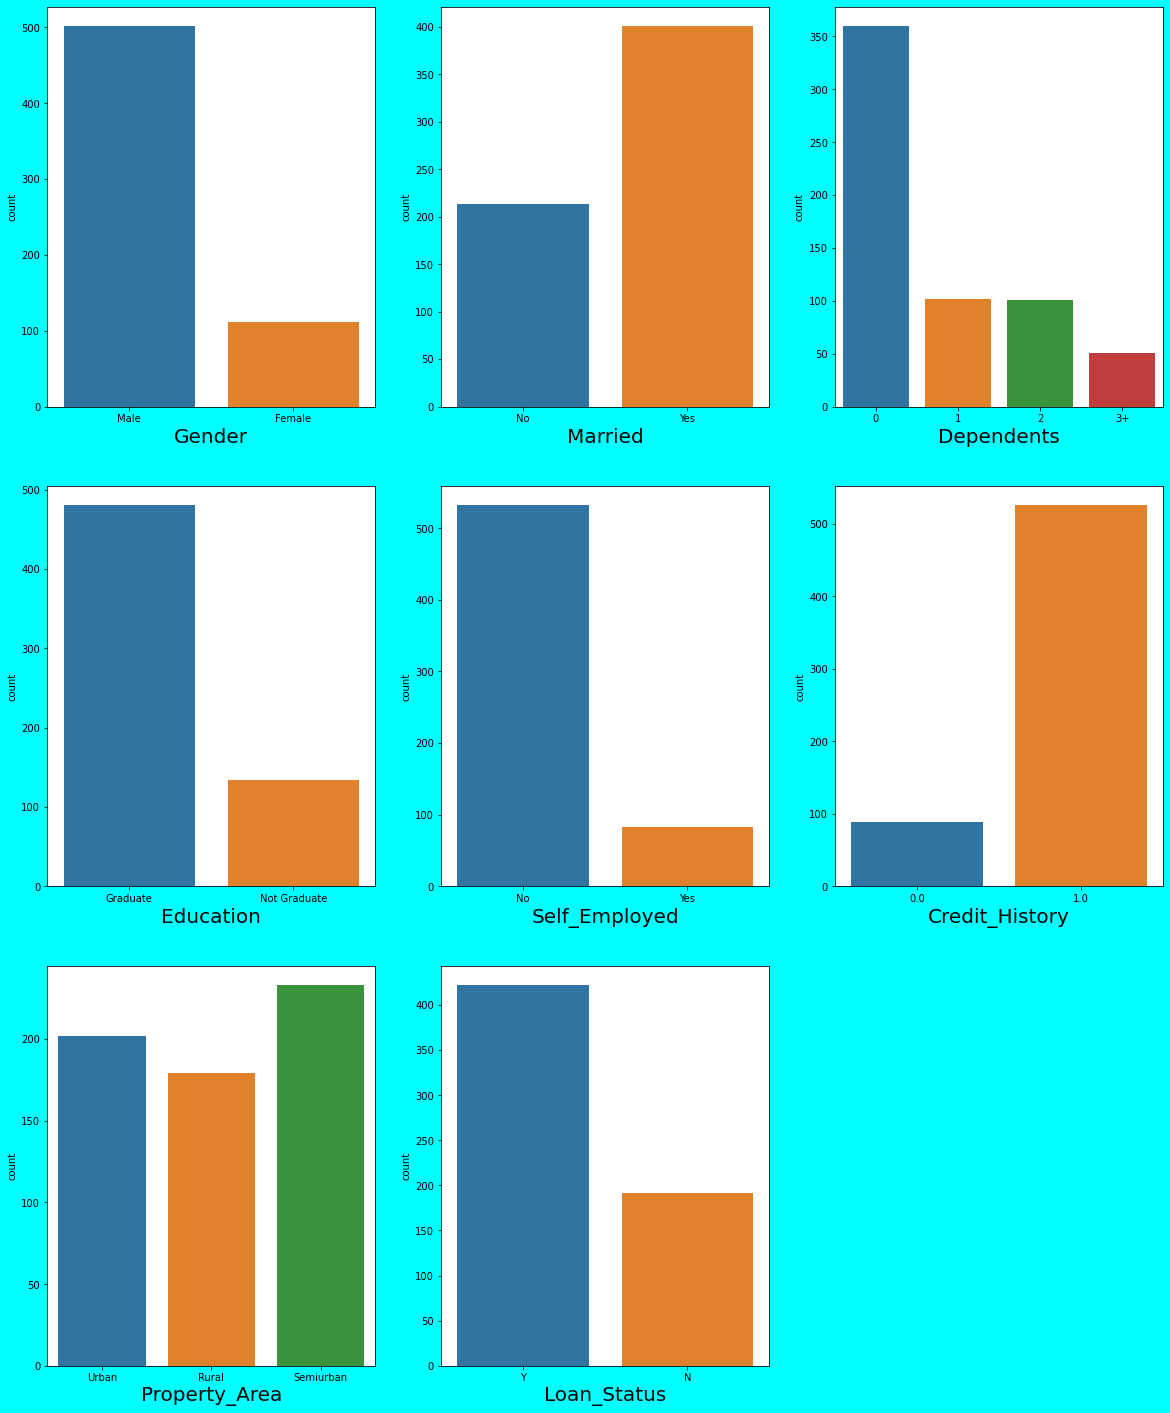

In [ ]:
plt.figure(figsize=(20,25),facecolor='cyan')
plotnumber=1

for column in catg:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.countplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

  * Out of Total loan application 80 % applicants are Male. We can Explore loan amount for each gender applied and evaluate whether on the same basis loan is approved for each gender or not?

  * Only 20% applicants are self employed. So it will interesting to gain insight on relation between Applicant income and loan approval for non self employed category. We will look to find any benchmark range of Income for loan approval.Another benchmark we will try to find is about loan requirement for these two categories.

  * Nearly 70% are married and 75% of loan applicants are graduates
Almost 60% of the applicants have no dependents.

  * Most of applicants come from Semi Urban areas, followed by Urban and Rural areas.

  * 80% people previously have credit history. Normally people having credit history are seen more prone to get loan approval.

  * Nearly 70 % applicant gets loan approved.

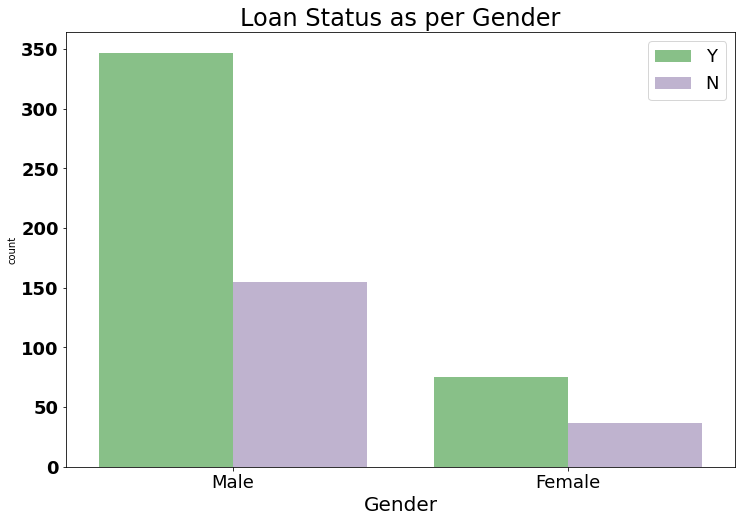

In [ ]:
plt.figure(figsize=(12,8))
p = sns.countplot(df['Gender'], hue=df['Loan_Status'], palette='Accent')
plt.title('Loan Status as per Gender', fontsize=24)
p.set_xlabel('Gender',fontsize=20)
plt.xticks(fontsize=18,rotation=0)
plt.yticks(fontsize=18,fontweight ='bold')
plt.legend(fontsize=18)
plt.show()

* **81.8% Applicant are male.**

* Irrespective Gender 65 % Applicant from each gender gets loan approval.It means that gender doesnot play any role loan approval.

* No Discrimation on name of Gender done.

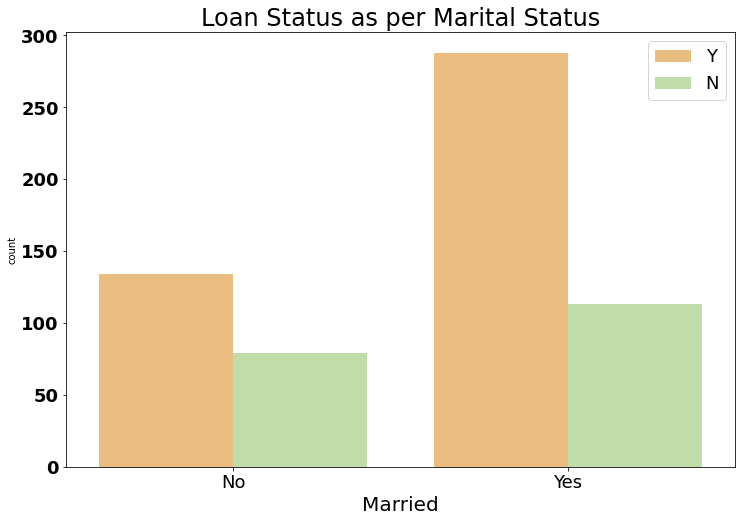

In [ ]:
plt.figure(figsize=(12,8))
p = sns.countplot(df['Married'], hue=df['Loan_Status'], palette='Spectral')
plt.title('Loan Status as per Marital Status', fontsize=24)
p.set_xlabel('Married',fontsize=20)
plt.xticks(fontsize=18,rotation=0)
plt.yticks(fontsize=18,fontweight ='bold')
plt.legend(fontsize=18)
plt.show()

In [ ]:
pd.crosstab([df['Gender'],df['Married']],[df.Loan_Status],margins=True).style.background_gradient(cmap="YlGnBu")

* *65.3 % loan applicants are married.** We can see from Count plot that Married people have more possibility of getting loan approval.
  * But Here comes Interesting observation from crosstab :
    * Unmarried Women are more chances of getting loan approval compare to married women.We will try to find which factor actually play deciding role here like education, employeement or Income.

    * Married Men are more chances of loan approval.

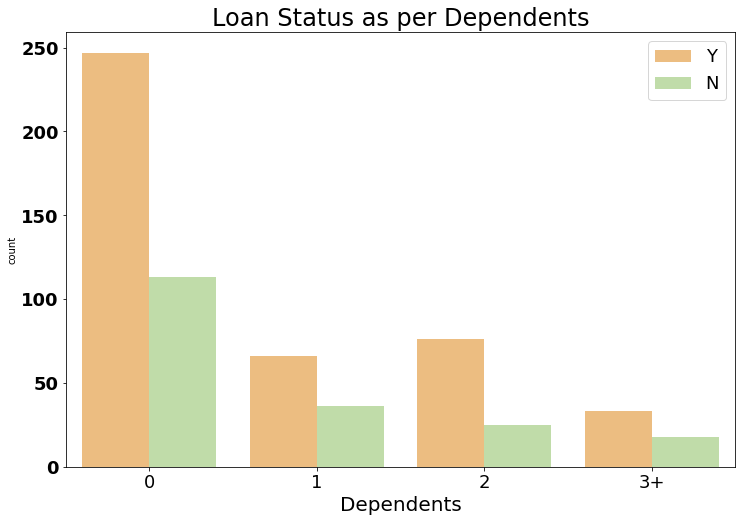

In [ ]:
plt.figure(figsize=(12,8))
p = sns.countplot(df['Dependents'], hue=df['Loan_Status'], palette='Spectral')
plt.title('Loan Status as per Dependents', fontsize=24)
p.set_xlabel('Dependents',fontsize=20)
plt.xticks(fontsize=18,rotation=0)
plt.yticks(fontsize=18,fontweight ='bold')
plt.legend(fontsize=18)
plt.show()

In [ ]:
pd.crosstab([df['Dependents']],[df.Loan_Status,df['Gender']],margins=True).style.background_gradient(cmap='summer_r')

* **58.6% Applicants** have no dependents on them.
 
* 33% Applicants have either 1 or 2 dependents. It will interesting check whether with increase in number dependents their is increase in requirement loan amount.

* Female having zero dependents have more chances to get loan approval compare to Females with dependents.

* For male Maximum loan approval comes with 0 dependents followed by 2 dependents.

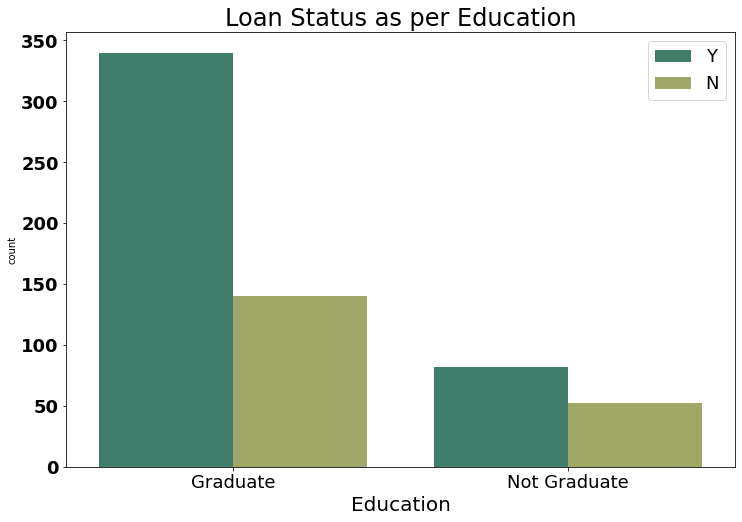

In [ ]:
plt.figure(figsize=(12,8))
p = sns.countplot(df['Education'], hue=df['Loan_Status'], palette='gist_earth')
plt.title('Loan Status as per Education', fontsize=24)
p.set_xlabel('Education',fontsize=20)
plt.xticks(fontsize=18,rotation=0)
plt.yticks(fontsize=18,fontweight ='bold')
plt.legend(fontsize=18)
plt.show()

In [ ]:
 pd.crosstab([df['Education'],df['Gender']],[df.Loan_Status],margins=True).style.background_gradient(cmap='Blues')

**Graduate applicants are more likely to get loan approval irrespective gender.**

In [ ]:
# Separating numerical variables

num = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term']

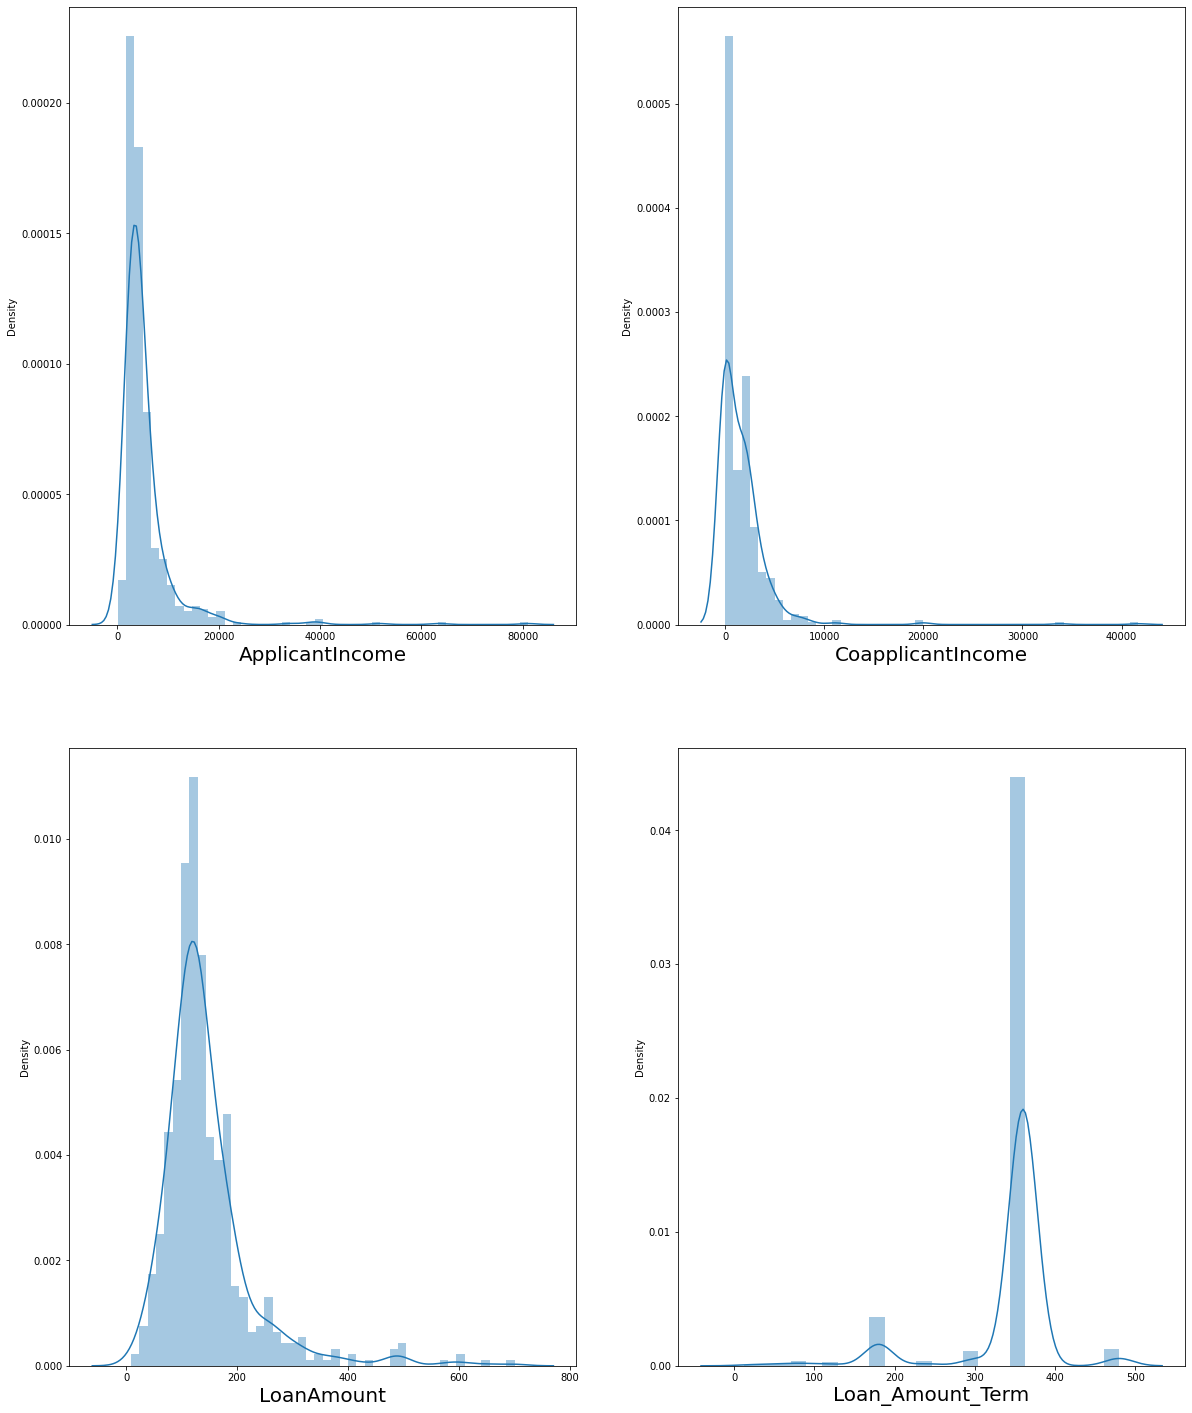

In [ ]:
plt.figure(figsize=(20,25),facecolor='w')
plotnumber=1

for column in num:
    if plotnumber<=4:
        ax = plt.subplot(2,2,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [ ]:
df.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.743053
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
dtype: float64

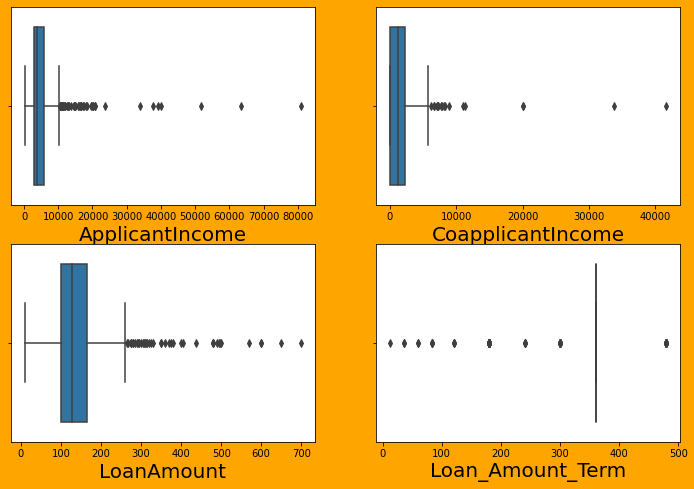

In [ ]:
# Lets see the outliers present in the data using boxplot

plt.figure(figsize=(12,8),facecolor='orange')
plotnumber=1

for column in num:
    if plotnumber<=4:
        ax = plt.subplot(2,2,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

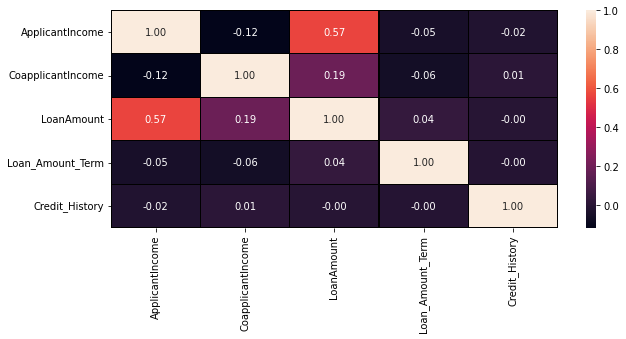

In [ ]:
# Plotting heatmap and checking correlation

plt.figure(figsize=(10,4))
sns.heatmap(df.corr(),annot =True,linewidths=0.15,linecolor='black',fmt="0.2f")

**Encoding the categorical variables**

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [ ]:
for i in df.columns:
    if df[i].dtypes == "object":
        df[i] = le.fit_transform(df[i].values.reshape(-1,1))

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


**Outlier Removal**

In [ ]:
# Removing outliers using zscore and keeping threshold as 3 (3 std from mean : 99.7% of data included)

from scipy.stats import zscore

z_score = np.abs(zscore(df))

filtering_entry = (z_score < 3).all(axis = 1)

df_new = df[filtering_entry]

In [ ]:
df_new.shape

(577, 13)

In [ ]:
print("Data loss in % : ",(614-577)/614*100)

Data loss in % :  6.026058631921824


**Power Transformer**

In [ ]:
# Considering skewness reduction through PowerTransformer

from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer()

In [ ]:
# Seperating features and target variable for classification task

X = df_new.drop('Loan_Status',axis=1)

y = df_new['Loan_Status']

In [ ]:
# Applying Power transformer

X_new_pt = pt.fit_transform(X)

# Converting numpy array(X_new_pt) into Dataframe and reassigning the values

X = pd.DataFrame(X_new_pt,columns= X.columns)

# Checking Skewness

X.skew().sort_values(ascending=False)

Self_Employed        2.252848
Education            1.306588
Loan_Amount_Term     0.727533
Dependents           0.478360
LoanAmount           0.048425
ApplicantIncome      0.027981
Property_Area       -0.155094
CoapplicantIncome   -0.191876
Loan_ID             -0.284298
Married             -0.630211
Gender              -1.622920
Credit_History      -1.976043
dtype: float64

* **All numerical variables** have skewness within the permissible limit

* Skewness present in the categorical variables is irrelevant

In [ ]:
# Checking multicollinearity in the dataset
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['Features'] = X.columns

vif

,vif,Features
0,1.044161,Loan_ID
1,1.219752,Gender
2,1.433278,Married
3,1.189534,Dependents
4,1.066531,Education
5,1.056094,Self_Employed
6,1.763646,ApplicantIncome
7,1.583442,CoapplicantIncome
8,1.549898,LoanAmount
9,1.048362,Loan_Amount_Term


**No multicollinearity exists in the given dataset**

**TARGET VARIABLE**

In [ ]:
df_new['Loan_Status'].value_counts()

1    398
0    179
Name: Loan_Status, dtype: int64

In [ ]:
print("The number of target classes before fit{}".format(Counter(y)))

The number of target classes before fitCounter({1: 398, 0: 179})


**Data is imbalanced,need balancing**

**BALANCING TARGET VARIABLE USING SMOTE**

In [ ]:
from imblearn.over_sampling import SMOTE

over_smp = SMOTE(0.8)

X,y = over_smp.fit_resample(X,y)

print("The number of target classes after fit{}".format(Counter(y)))

The number of target classes after fitCounter({1: 398, 0: 318})


**SCALING USING STANDARD SCALER**

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaler = scaler.fit_transform(X)

**MODEL BUILDING**

In [ ]:
# Importing required libraries

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import plot_roc_curve
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
import pickle
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV

In [ ]:
# Defining function for calculating the performance of the classification model

def metric_score(clf,X_train,X_test,y_train,y_test,train = True):
    if train:
        y_pred = clf.predict(X_train)
        
        print("-----------------Train Result--------------------")
        
        print(f"Accuracy Score : {accuracy_score(y_train,y_pred)*100:.2f}%")
        
    elif train == False:
        
        pred = clf.predict(X_test)
        
        matrix = confusion_matrix(y_test,pred)
        
        print("-----------------Test Result--------------------")
        
        print("Confusion Matrix \n",matrix)
        
        print(f"Accuracy Score : {accuracy_score(y_test,pred)*100:.2f}%")
        
        print("\n Test Classification Report \n ", classification_report(y_test,pred,digits =2))

**BEST RANDOM STATE**

In [ ]:
maxAccu = 0 # Max Accuracy
maxRS = 0   # Best random state for which maximum accuracy is achieved

for i in range(0,1000):
    X_train,X_test,y_train,y_test = train_test_split(X_scaler,y,test_size=0.2,random_state=i)
  
    lr = LogisticRegression()
    
    lr.fit(X_train,y_train)    # Training the model
   
    pred_lr = lr.predict(X_test)    # Predicting the target variable
 
    acc_lr = accuracy_score(y_test,pred_lr)
  
    if acc_lr>maxAccu:
    
        maxAccu = acc_lr
        
        maxRS = i
        
print("Maximum Accuracy:",maxAccu,"at random state ", maxRS)


Maximum Accuracy: 0.8472222222222222 at random state  307


**Train Test Split using best Random State**

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_scaler,y,test_size=0.2,random_state=307)

**Logistic Regression**

In [ ]:
lr = LogisticRegression()

lr.fit(X_train,y_train)

pred_lr = lr.predict(X_test)    # Predicted values

metric_score(lr,X_train,X_test,y_train,y_test,train=True)

metric_score(lr,X_train,X_test,y_train,y_test,train=False)

cr_lr = cross_val_score(lr,X_scaler,y,cv=5)

print("Cross validation score of Logistic regression model :",cr_lr.mean()*100)

-----------------Train Result--------------------
Accuracy Score : 74.65%
-----------------Test Result--------------------
Confusion Matrix 
 [[37 28]
 [ 9 70]]
Accuracy Score : 74.31%

 Test Classification Report 
                precision    recall  f1-score   support

           0       0.80      0.57      0.67        65
           1       0.71      0.89      0.79        79

    accuracy                           0.74       144
   macro avg       0.76      0.73      0.73       144
weighted avg       0.75      0.74      0.73       144

Cross validation score of Logistic regression model : 68.59557109557109


**Tuning parameters for Logistic Regression**

In [ ]:
lr_params = {'penalty':['l1', 'l2','elasticnet'],
             'tol':[0.0001,0.001,0.01],
             'solver':['newton-cg', 'lbfgs', 'liblinear'],
             'multi_class':['auto', 'ovr', 'multinomial']}

grd_lr = GridSearchCV(lr,param_grid = lr_params, n_jobs =-1)

grd_lr.fit(X_train,y_train)

print("Best parameters : ",grd_lr.best_params_)

Best parameters :  {'multi_class': 'auto', 'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.0001}


In [ ]:
lr = grd_lr.best_estimator_

lr.fit(X_train,y_train)

pred_lr = lr.predict(X_test)    # Predicted values

metric_score(lr,X_train,X_test,y_train,y_test,train=True)

metric_score(lr,X_train,X_test,y_train,y_test,train=False)

cr_lr = cross_val_score(lr,X_scaler,y,cv=5)

print("Cross validation score of Logistic regression model :",cr_lr.mean()*100)

-----------------Train Result--------------------
Accuracy Score : 74.48%
-----------------Test Result--------------------
Confusion Matrix 
 [[35 30]
 [ 6 73]]
Accuracy Score : 75.00%

 Test Classification Report 
                precision    recall  f1-score   support

           0       0.85      0.54      0.66        65
           1       0.71      0.92      0.80        79

    accuracy                           0.75       144
   macro avg       0.78      0.73      0.73       144
weighted avg       0.77      0.75      0.74       144

Cross validation score of Logistic regression model : 69.01223776223776


**KNN Classifier**

In [ ]:
knn = KNeighborsClassifier()

knn.fit(X_train,y_train)

pred_knn = knn.predict(X_test)    # Predicted values

metric_score(knn,X_train,X_test,y_train,y_test,train=True)

metric_score(knn,X_train,X_test,y_train,y_test,train=False)

cr_knn = cross_val_score(knn,X_scaler,y,cv=5)

print("Cross validation score of K Neighbors Classifier model :",cr_knn.mean()*100)

-----------------Train Result--------------------
Accuracy Score : 81.64%
-----------------Test Result--------------------
Confusion Matrix 
 [[48 17]
 [20 59]]
Accuracy Score : 74.31%

 Test Classification Report 
                precision    recall  f1-score   support

           0       0.71      0.74      0.72        65
           1       0.78      0.75      0.76        79

    accuracy                           0.74       144
   macro avg       0.74      0.74      0.74       144
weighted avg       0.74      0.74      0.74       144

Cross validation score of K Neighbors Classifier model : 70.81293706293707


**Tuning parameters for KNN**

In [ ]:
knn_params = { 'n_neighbors':[4,5,6],
        'weights':['uniform','distance'],
    'algorithm':['auto','ball_tree','brute'],
    'leaf_size':[25,30]}

grd_knn = GridSearchCV(knn,param_grid = knn_params, n_jobs =-1)

grd_knn.fit(X_train,y_train)

print("Best parameters : ",grd_knn.best_params_)

Best parameters :  {'algorithm': 'auto', 'leaf_size': 25, 'n_neighbors': 6, 'weights': 'distance'}


In [ ]:
knn = grd_knn.best_estimator_

knn.fit(X_train,y_train)

pred_knn = knn.predict(X_test)    # Predicted values

metric_score(knn,X_train,X_test,y_train,y_test,train=True)

metric_score(knn,X_train,X_test,y_train,y_test,train=False)

cr_knn = cross_val_score(knn,X_scaler,y,cv=5)

print("Cross validation score of K Neighbors Classifier model :",cr_knn.mean()*100)

-----------------Train Result--------------------
Accuracy Score : 100.00%
-----------------Test Result--------------------
Confusion Matrix 
 [[54 11]
 [17 62]]
Accuracy Score : 80.56%

 Test Classification Report 
                precision    recall  f1-score   support

           0       0.76      0.83      0.79        65
           1       0.85      0.78      0.82        79

    accuracy                           0.81       144
   macro avg       0.80      0.81      0.80       144
weighted avg       0.81      0.81      0.81       144

Cross validation score of K Neighbors Classifier model : 75.28069153069154


**Decision Tree Classifier**

In [ ]:
dt = DecisionTreeClassifier()

dt.fit(X_train,y_train)      # Model training

pred_dt = dt.predict(X_test)    # Predicted values

metric_score(dt,X_train,X_test,y_train,y_test,train=True)  # Training result

metric_score(dt,X_train,X_test,y_train,y_test,train=False)  # Test result

cr_dt = cross_val_score(dt,X_scaler,y,cv=5)

print("Cross validation score of Decision Tree Classifier model :",cr_dt.mean()*100)

-----------------Train Result--------------------
Accuracy Score : 100.00%
-----------------Test Result--------------------
Confusion Matrix 
 [[51 14]
 [17 62]]
Accuracy Score : 78.47%

 Test Classification Report 
                precision    recall  f1-score   support

           0       0.75      0.78      0.77        65
           1       0.82      0.78      0.80        79

    accuracy                           0.78       144
   macro avg       0.78      0.78      0.78       144
weighted avg       0.79      0.78      0.79       144

Cross validation score of Decision Tree Classifier model : 42.88461538461538


**Tuning parameters for Decision Tree**

In [ ]:
grid_param = {'max_depth': range(15,20),
              'criterion': ['gini','entropy'],
              'min_samples_leaf': range(8,14),
              'min_samples_split': range(2,6),
              'max_leaf_nodes': range(40,50)
             }

grid_search = GridSearchCV(estimator = dt, param_grid = grid_param,n_jobs =-1)

grid_search.fit(X_train,y_train)

print("Best parameters : ",grid_search.best_params_)

Best parameters :  {'criterion': 'entropy', 'max_depth': 15, 'max_leaf_nodes': 44, 'min_samples_leaf': 9, 'min_samples_split': 5}


In [ ]:
dt = grid_search.best_estimator_

dt.fit(X_train,y_train)      # Model training

pred_dt = dt.predict(X_test)    # Predicted values

metric_score(dt,X_train,X_test,y_train,y_test,train=True)  # Training result

metric_score(dt,X_train,X_test,y_train,y_test,train=False)  # Test result

cr_dt = cross_val_score(dt,X_scaler,y,cv=5)

print("Cross validation score of Decision Tree Classifier model :",cr_dt.mean()*100)

-----------------Train Result--------------------
Accuracy Score : 87.59%
-----------------Test Result--------------------
Confusion Matrix 
 [[48 17]
 [20 59]]
Accuracy Score : 74.31%

 Test Classification Report 
                precision    recall  f1-score   support

           0       0.71      0.74      0.72        65
           1       0.78      0.75      0.76        79

    accuracy                           0.74       144
   macro avg       0.74      0.74      0.74       144
weighted avg       0.74      0.74      0.74       144

Cross validation score of Decision Tree Classifier model : 44.004467754467754


**Random Forest Classifier**

In [ ]:
rf = RandomForestClassifier()

rf.fit(X_train,y_train)      # Model training

pred_rf = rf.predict(X_test)    # Predicted values

metric_score(rf,X_train,X_test,y_train,y_test,train=True)  # Training result

metric_score(rf,X_train,X_test,y_train,y_test,train=False)  # Test result

cr_rf = cross_val_score(rf,X_scaler,y,cv=5)

print("Cross validation score of Random Forest Classifier model :",cr_rf.mean()*100)

-----------------Train Result--------------------
Accuracy Score : 100.00%
-----------------Test Result--------------------
Confusion Matrix 
 [[48 17]
 [10 69]]
Accuracy Score : 81.25%

 Test Classification Report 
                precision    recall  f1-score   support

           0       0.83      0.74      0.78        65
           1       0.80      0.87      0.84        79

    accuracy                           0.81       144
   macro avg       0.81      0.81      0.81       144
weighted avg       0.81      0.81      0.81       144

Cross validation score of Random Forest Classifier model : 49.177350427350426


**Tuning parameters for Random Forest**

In [ ]:
params_rf = {'criterion':['gini','entropy'],
         'max_depth': [10,13,15],
         'min_samples_split' :[2,3,4],
         'min_samples_leaf' :[1,2,3]}

grd_rf = GridSearchCV(rf,param_grid = params_rf,n_jobs =-1)

grd_rf.fit(X_train,y_train)

print("Best parameters : ",grd_rf.best_params_)

Best parameters :  {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 4}


In [ ]:
rf = grd_rf.best_estimator_

rf.fit(X_train,y_train)

pred_rf = rf.predict(X_test)    # Predicted values

metric_score(rf,X_train,X_test,y_train,y_test,train=True)  # Training result

metric_score(rf,X_train,X_test,y_train,y_test,train=False)  # Test result

cr_rf = cross_val_score(rf,X_scaler,y,cv=5)

print("Cross validation score of Random Forest Classifier model :",cr_rf.mean()*100)

-----------------Train Result--------------------
Accuracy Score : 99.48%
-----------------Test Result--------------------
Confusion Matrix 
 [[48 17]
 [10 69]]
Accuracy Score : 81.25%

 Test Classification Report 
                precision    recall  f1-score   support

           0       0.83      0.74      0.78        65
           1       0.80      0.87      0.84        79

    accuracy                           0.81       144
   macro avg       0.81      0.81      0.81       144
weighted avg       0.81      0.81      0.81       144

Cross validation score of Random Forest Classifier model : 45.54390054390055


**Support Vector Classifier**

In [ ]:
svc = SVC()

svc.fit(X_train,y_train)

pred_svc = svc.predict(X_test)    # Predicted values

metric_score(svc,X_train,X_test,y_train,y_test,train=True)

metric_score(svc,X_train,X_test,y_train,y_test,train=False)

cr_svc = cross_val_score(svc,X_scaler,y,cv=5)

print("Cross validation score of Support Vector Classifier model :",cr_svc.mean()*100)

-----------------Train Result--------------------
Accuracy Score : 83.04%
-----------------Test Result--------------------
Confusion Matrix 
 [[43 22]
 [10 69]]
Accuracy Score : 77.78%

 Test Classification Report 
                precision    recall  f1-score   support

           0       0.81      0.66      0.73        65
           1       0.76      0.87      0.81        79

    accuracy                           0.78       144
   macro avg       0.78      0.77      0.77       144
weighted avg       0.78      0.78      0.77       144

Cross validation score of Support Vector Classifier model : 69.69988344988344


**Tuning parameters for SVC**

In [ ]:
svc_params = {'kernel':['rbf','linear','poly','sigmoid'],
              'gamma':['scale','auto'],
              'decision_function_shape':['ovr','ovo']
              }

grd_svc = GridSearchCV(svc,param_grid = svc_params,n_jobs =-1)

grd_svc.fit(X_train,y_train)

print("Best parameters : ",grd_svc.best_params_)

Best parameters :  {'decision_function_shape': 'ovr', 'gamma': 'auto', 'kernel': 'rbf'}


In [ ]:
svc = grd_svc.best_estimator_

svc.fit(X_train,y_train)

pred_svc = svc.predict(X_test)    # Predicted values

metric_score(svc,X_train,X_test,y_train,y_test,train=True)

metric_score(svc,X_train,X_test,y_train,y_test,train=False)

cr_svc = cross_val_score(svc,X_scaler,y,cv=5)

print("Cross validation score of Support Vector Classifier model :",cr_svc.mean()*100)

-----------------Train Result--------------------
Accuracy Score : 82.69%
-----------------Test Result--------------------
Confusion Matrix 
 [[43 22]
 [10 69]]
Accuracy Score : 77.78%

 Test Classification Report 
                precision    recall  f1-score   support

           0       0.81      0.66      0.73        65
           1       0.76      0.87      0.81        79

    accuracy                           0.78       144
   macro avg       0.78      0.77      0.77       144
weighted avg       0.78      0.78      0.77       144

Cross validation score of Support Vector Classifier model : 69.69988344988344


**PLOTTING ROC AUC CURVE**

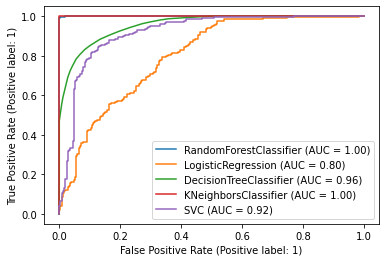

In [ ]:
from sklearn.metrics import plot_roc_curve

# Plotting ROC AUC curve on training data

disp = plot_roc_curve(rf,X_train,y_train)

plot_roc_curve(lr,X_train,y_train,ax=disp.ax_)

plot_roc_curve(dt,X_train,y_train,ax=disp.ax_)

plot_roc_curve(knn,X_train,y_train,ax=disp.ax_)

plot_roc_curve(svc,X_train,y_train,ax=disp.ax_)

plt.legend(prop={'size':10},loc='lower right')

plt.show()

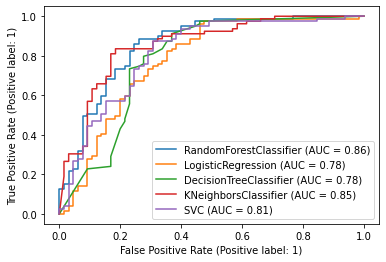

In [ ]:
# Plotting ROC AUC curve on test data

disp = plot_roc_curve(rf,X_test,y_test)

plot_roc_curve(lr,X_test,y_test,ax=disp.ax_)

plot_roc_curve(dt,X_test,y_test,ax=disp.ax_)

plot_roc_curve(knn,X_test,y_test,ax=disp.ax_)

plot_roc_curve(svc,X_test,y_test,ax=disp.ax_)

plt.legend(prop={'size':10},loc='lower right')

plt.show()

**As per ROC AUC Curve**, **Logistic Regression** looks to be the **best model** from the lot as there is *minimum difference* between the *training and test accuracy* and *better cross validation score*

**Saving the Model**

In [ ]:
filename = 'loan_application_clf.pkl'
pickle.dump(lr,open(filename,'wb'))

**CONCLUSION**

In [ ]:
loaded_model = pickle.load(open('loan_application_clf.pkl','rb'))

pred_lr = loaded_model.predict(X_test)

result = accuracy_score(y_test,pred_lr)

print(result*100)

75.0


In [ ]:
conclusion = pd.DataFrame([pred_lr,y_test],index=['Predicted','Original'])

conclusion

,0,1,2,3,4,5,6,7,8,9,...,134,135,136,137,138,139,140,141,142,143
Predicted,1,1,1,1,1,1,1,0,1,0,...,1,1,0,0,1,1,1,0,0,1
Original,1,1,1,0,0,0,0,0,0,0,...,1,1,0,0,1,1,0,0,0,1
